In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
LIMITION = 900

class K_means:
  def __init__(self, k, data, iteration):
    self.k = k
    self.data = data
    self.iteration = iteration
  def Centroids(self, ):
    data = self.data.to_numpy()
    idx = np.random.randint(int(np.size(data,0)), size = int(self.k))
    sampled_cen = data[idx, : ]
    return sampled_cen
  def get_UD(self, data, centroids, clusters):
    for ins in data:
      mu = min([(i[0], np.linalg.norm(ins-centroids[i[0]])) \
                for i in enumerate(centroids)], key=lambda t:t[1])[0]
      try:
        clusters[mu].append(ins)
      except KeyError:
        clusters[mu] = [ins]
    for result in clusters:
      if not result:
        result.append(data[np.random.randint(0, len(data), size =1)].flatten().tolist())
    return clusters
  def Assignment(self, ):
    data = self.data.to_numpy()
    cen = self.Centroids()
    prev_centro = [[] for i in range(self.k)]
    iters = 0
    while self.Update(cen, prev_centro, iters) is not True:
      iters = iters + 1
      clusters = [[]for i in range(self.k)]
      old_result = [[]for i in range(self.k)]
      clusters = self.get_UD(data, cen, clusters)
      idx = 0
      for result in clusters:
        prev_centro[idx] = cen[idx]
        cen[idx] = np.mean(result, axis=0).tolist()
        idx = idx + 1
      if np.array_equal(old_result, result) is True:
        iters = 0
      iteration = self.iteration
      old_result = result
    return clusters, iteration
  def Update(self, centroids, prev_centro, iters):
    if iters > LIMITION:
      return True
    return prev_centro == centroids
  def Train(self, ):
    iteration = 0
    result, iteration = self.Assignment()
    self.iteration = iteration
    return result
    

In [19]:
def Show_Kmeans(k, data, iteration =1000):
  colorlist = ['r','b','g','c','m','y','k']
  data = pd.read_csv("C:\\Users\\PAN\\Google 드라이브\\Colab Notebooks\\randomized_data.csv")
  model1 = K_means(k=k, data = data, iteration = 1000)
  clusters = model1.Train()
  result = []

  for i in range(k):
    result = np.array(clusters[i])
    result_x = result[:,0]
    result_y = result[:,1]
    plt.scatter(result_x, result_y, c=str((colorlist[i])))
    
  plt.title("Implementation")
  plt.show()

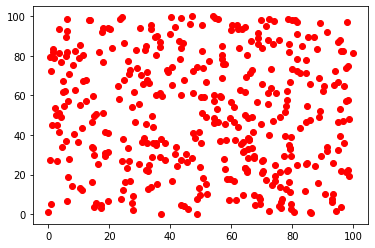

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


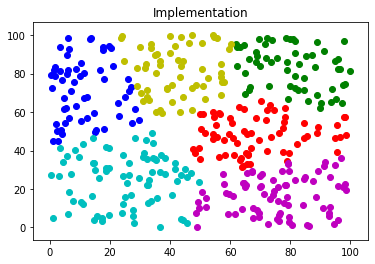

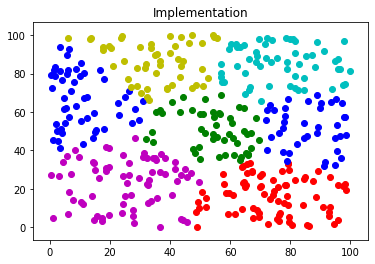

In [15]:
random_data = np.random.rand(401,2) * 100
random_data[0][0] = 0
random_data[0][1] = 1

x_data = random_data[ : ,[0]]
y_data = random_data[ : ,[1]]

plt.plot(x_data, y_data, 'ro')
plt.show()

np.savetxt("randomized_data.csv", random_data, delimiter = ',')

#x = read_data.iloc[ : , 1]
#y = read_data.iloc[ : , 0]

Show_Kmeans(6, data)
Show_Kmeans(7, data)